In [0]:
import pandas as pd
import numpy as np
from os import path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/tpa/'
monolith_dir = path.join(pwd, 'monolith')
final_features = path.join(monolith_dir, 'features.csv')

In [0]:
root = pd.read_csv(final_features)

In [5]:
root.head()

,screen_name,acct_age,follower_count,friends_count,statuses_count,favorites_count,avg_status_count,verified_acct,default_image,default_profile,rel_new_acct,isbot
0,FearlessDPSingh,3712,2744,3102,8773,3985,2.363416,0,0,0,0,0
1,Tiger_Azam4U,2772,6711,199,79754,2857,28.771284,0,0,0,0,0
2,SmarikaRout1,91,1041,497,9636,7894,105.890110,0,0,1,1,0
3,RekhaYaduvansi,480,17670,4570,36379,493,75.789583,0,0,1,0,1
4,bittupandit34,1697,10061,975,43944,1146,25.895109,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [0]:
root = root[root.follower_count <100001]
X = root[[
  'acct_age', 'follower_count', 'friends_count', 'statuses_count',
  'favorites_count', 'avg_status_count', 'verified_acct', 'default_image',
  'default_profile', 'rel_new_acct'
]]
Y = root[['isbot']]

In [8]:
print(X.shape)

(46127, 10)


In [9]:
Y.head()

,isbot
0,0
1,0
2,0
3,1
4,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=782)

In [0]:
sd_scalar = StandardScaler()
sd_scalar.fit(X_train)
sd_X_train = sd_scalar.transform(X_train)
sd_X_test = sd_scalar.transform(X_test)

In [0]:
def draw_roc_auc(model, x_test, y_test):
  probs = model.predict_proba(x_test)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = auc(fpr, tpr)

  plt.title('ROC_AUC')
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.9671528051504401


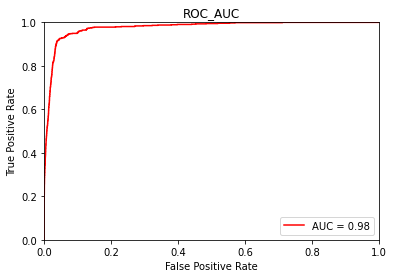

(0.9671528051504401, 0.9671528051504401, 0.9671528051504401, None)
(0.8944869653531071, 0.7008690992786598, 0.7629629168236844, None)
(0.9634633695757412, 0.9671528051504401, 0.9618341557376254, None)


In [13]:
# non scaled SVM

svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)
print('SVM accuracy is', accuracy_score(y_test, pred_svm))
draw_roc_auc(svm_clf, X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_svm, average='micro'))
print(precision_recall_fscore_support(y_test, pred_svm, average='macro'))
print(precision_recall_fscore_support(y_test, pred_svm, average='weighted'))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM accuracy is 0.9633425305478912


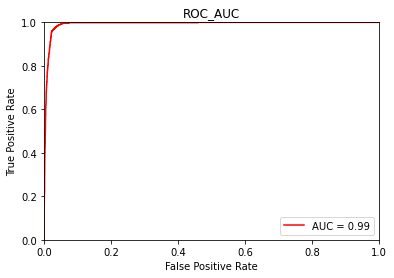

(0.9633425305478912, 0.9633425305478912, 0.9633425305478912, None)
(0.783759831509597, 0.9729527861106488, 0.8504130730527422, None)
(0.9784539647247662, 0.9633425305478912, 0.9679020595288688, None)


In [14]:
# scaled SVM

svm_clf_sd = SVC(probability=True, class_weight='balanced')
svm_clf_sd.fit(sd_X_train, y_train)
pred_svm_sd = svm_clf_sd.predict(sd_X_test)
print('SVM accuracy is', accuracy_score(y_test, pred_svm_sd))
draw_roc_auc(svm_clf_sd, sd_X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_svm_sd, average='micro'))
print(precision_recall_fscore_support(y_test, pred_svm_sd, average='macro'))
print(precision_recall_fscore_support(y_test, pred_svm_sd, average='weighted'))

GaussianNB accuracy is 0.9458021284982262


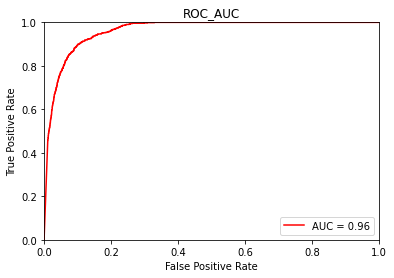

(0.9458021284982262, 0.9458021284982262, 0.9458021284982262, None)
(0.7235271516886597, 0.8507288499555505, 0.770136328688311, None)
(0.9614689348611847, 0.9458021284982262, 0.951782184657683, None)


In [18]:
# non scaled NB

nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print('GaussianNB accuracy is', accuracy_score(y_test, pred_nb))
draw_roc_auc(nb, X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_nb, average='micro'))
print(precision_recall_fscore_support(y_test, pred_nb, average='macro'))
print(precision_recall_fscore_support(y_test, pred_nb, average='weighted'))

GaussianNB accuracy is 0.9383129680725266


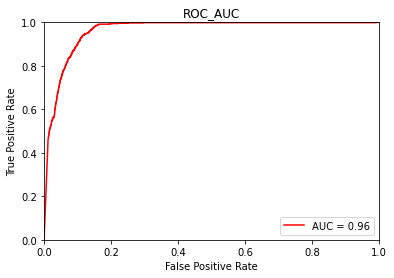

(0.9383129680725266, 0.9383129680725266, 0.9383129680725266, None)
(0.7039316336729147, 0.8513418064762307, 0.7536597876819812, None)
(0.9599315671019241, 0.9383129680725266, 0.9464534565623139, None)


In [19]:
# scaled NB

nb_sd = GaussianNB()
nb_sd.fit(sd_X_train, y_train)
pred_nb_sd = nb_sd.predict(sd_X_test)
print('GaussianNB accuracy is', accuracy_score(y_test, pred_nb_sd))
draw_roc_auc(nb_sd, sd_X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_nb_sd, average='micro'))
print(precision_recall_fscore_support(y_test, pred_nb_sd, average='macro'))
print(precision_recall_fscore_support(y_test, pred_nb_sd, average='weighted'))

DTC accuracy is 0.9970437524635396


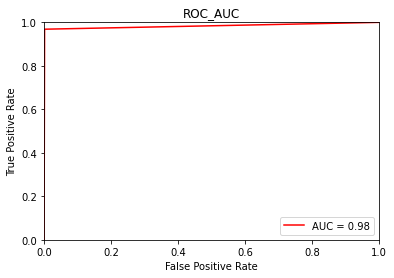

(0.9970437524635396, 0.9970437524635396, 0.9970437524635396, None)
(0.9841379655851694, 0.9835090340048793, 0.9838232721709483, None)
(0.9970418768950353, 0.9970437524635396, 0.9970427917426407, None)


In [20]:
# non scaled DTC

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print('DTC accuracy is', accuracy_score(y_test, pred_dt))
draw_roc_auc(dt, X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_dt, average='micro'))
print(precision_recall_fscore_support(y_test, pred_dt, average='macro'))
print(precision_recall_fscore_support(y_test, pred_dt, average='weighted'))

DTC accuracy is 0.997306530022336


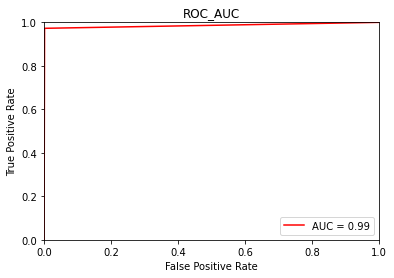

(0.997306530022336, 0.997306530022336, 0.997306530022336, None)
(0.9849656065800043, 0.9855955217640158, 0.9852803365195331, None)
(0.9973083240219643, 0.997306530022336, 0.9973074040824786, None)


In [21]:
# scaled DTC

dt_sd = DecisionTreeClassifier()
dt_sd.fit(sd_X_train, y_train)
pred_dt_sd = dt_sd.predict(sd_X_test)
print('DTC accuracy is', accuracy_score(y_test, pred_dt_sd))
draw_roc_auc(dt_sd, sd_X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_dt_sd, average='micro'))
print(precision_recall_fscore_support(y_test, pred_dt_sd, average='macro'))
print(precision_recall_fscore_support(y_test, pred_dt_sd, average='weighted'))

Random Forest accuracy is 0.9967809749047432


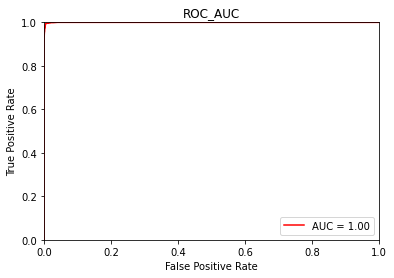

(0.9967809749047432, 0.9967809749047432, 0.9967809749047432, None)
(0.9889349465037192, 0.9755771330683953, 0.9821531779131322, None)
(0.996757099148125, 0.9967809749047432, 0.9967586845240144, None)


In [22]:
# non scaled RF

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest accuracy is', accuracy_score(y_test, pred_rf))
draw_roc_auc(rf, X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_rf, average='micro'))
print(precision_recall_fscore_support(y_test, pred_rf, average='macro'))
print(precision_recall_fscore_support(y_test, pred_rf, average='weighted'))

Random Forest accuracy is 0.9968466692944422


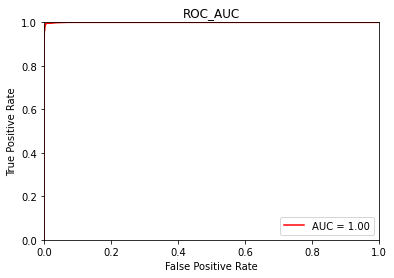

(0.9968466692944422, 0.9968466692944422, 0.9968466692944422, None)
(0.9870764517789998, 0.978209598655555, 0.9825977139921758, None)
(0.9968268284117593, 0.9968466692944422, 0.9968321865462042, None)


In [23]:
# scaled RF

rf_sd = RandomForestClassifier()
rf_sd.fit(sd_X_train, y_train)
pred_rf_sd = rf_sd.predict(sd_X_test)
print('Random Forest accuracy is', accuracy_score(y_test, pred_rf_sd))
draw_roc_auc(rf_sd, sd_X_test, y_test)
print(precision_recall_fscore_support(y_test, pred_rf_sd, average='micro'))
print(precision_recall_fscore_support(y_test, pred_rf_sd, average='macro'))
print(precision_recall_fscore_support(y_test, pred_rf_sd, average='weighted'))

In [24]:
len(y_test['isbot']), sum(y_test['isbot']), sum(pred_rf)

(15222, 731, 710)

In [0]:
# StratifiedShuffleSplit, for rigorous training but doesn't help in improving

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=25, test_size=0.33, random_state=23)

XX = X.values
YY = Y.values

rf_sss = RandomForestClassifier()

for train_index, test_index in sss.split(XX, YY):
  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = XX[train_index], XX[test_index]
  Y_train, Y_test = YY[train_index], YY[test_index]

  rf_sss.fit(X_train, Y_train)
  pred_rf_sss = rf_sss.predict(X_test)
  # print('Random Forest accuracy is', accuracy_score(Y_test, pred_rf_sss))
  # draw_roc_auc(rf_sss, X_test, Y_test)
  print(precision_recall_fscore_support(Y_test, pred_rf_sss, average='weighted'))

In [0]:
import tweepy

consumer_key = "JbhkSllQEEowFT000MRpEDaWq"
consumer_secret = "VoM097AKZtxSBnWvwP8MV39AGOuG1JArHf87wLpRF2L5CMZwF4"
access_key = "1708179600-1jTfBFKcs3uIR4pHAAYC3y2za8051gfs0avFdRY"
access_secret = "B3BOGQ7I45zq4OZWMg6gCFWj794Mjo0U4FrCsynq1y5i4"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [0]:
users = {}

def get_user_values(hndle):
  if hndle in users:
    return users[hndle]

  user = api.get_user(hndle)
  from datetime import datetime
  young_date = datetime(2019, 6, 1)
  acct_creation_time = user.created_at

  screen_name = user.screen_name
  follower_count = user.followers_count
  friends_count = user.friends_count
  statuses_count = user.statuses_count
  favorites_count = user.favourites_count
  acct_age = (datetime(2020, 3, 1) - acct_creation_time).days
  tweets_per_day = int(user.statuses_count) / acct_age

  vals = [list({
    'acct_age': acct_age,
    'follower_count': user.followers_count,
    'friends_count': user.friends_count or 1,
    'statuses_count': user.statuses_count,
    'favorites_count': favorites_count,
    'avg_status_count': statuses_count / acct_age,
    'verified_acct': 1 if user.verified else 0,
    'default_image': 1 if user.default_profile_image else 0,
    'default_profile': 1 if user.default_profile else 0,
    'rel_new_acct': 1 if acct_creation_time > young_date else 0
  }.values())]

  vals_sd = sd_scalar.transform(vals)

  users[hndle] = (vals, vals_sd)

  return vals, vals_sd

In [77]:
vals, vals_sd = get_user_values('taylorswift13')

names = ['SVM', 'GaussianNB', 'Decission Tree', 'Random Forest']
classifiers = [[svm_clf, svm_clf_sd], [nb, nb_sd], [dt, dt_sd], [rf, rf_sd]]

results = list(map(lambda t: (t[0].predict(vals), t[1].predict(vals_sd)), classifiers))

print("%20s %10s %10s" % ('', 'Unscaled', 'Scaled'))
for i in range(len(names)):
  print("%20s  %6d     %6d" % (names[i], results[i][0], results[i][1]))

                       Unscaled     Scaled
                 SVM       1          1
          GaussianNB       1          1
      Decission Tree       0          0
       Random Forest       0          0


In [0]:
bot_handles = ["pattavis","AlleHanna","Peugeotcrew","Cappellaio87","filippotrav","AnnaMinervini1","lindascanona","righettifrance1","Diletta123","LuanaPirri","GInterrato","lontano2009","ImparatoPasqual","GiuliettaSkype","LorettaLORI3","enzarella2","raffa_brigante","EMZONERI","GSpasmo","wasitjustalie","elena2613","Cat2014_Believe","loririlolo","Pesce98Vittoria","francorosaria13","citro_rosa","AngiSvezia","Caranoemitw","beauty0fsilence","zia_eli","ggarigli","GabriPobega","Fiffistefy","GiuseppinaFarin","MariaHelena_ts","GiulianaPoce","ElenaLvdzdv","annarosa701","MonicaDieci","VeronicaFilia","Mary_Jack69","allylardo","IndieGameTrends","brunetta_8","56_nico","GABRIELLAMARA2","emmemea","EmyScanu","sorciusbarbutus","1IlMigliore","ILgrandeRIO","launizzo","THESlGNOFHARRY","vivitanie","giunta2016","__Spiderlily__","simona83imperia","Gianniontheroad","GiusiRiccobono","NovellaPiazzi","danysca22","RedsRita","0Claudia9","BrunaVerutti","circeanna","Elly15vs","_Vylmax","novellapiazzi1","MomiraMonika","annatic1","lorettalo22","dani89vs","elisabettaragg1","giannalecca1","lisettaliz","Viola_rossa3","ariacolorata2","valentinamoscon","vale20152","tizianafu","antonellautopia","_harryobsessed","949905e897cf45a","GiorgiaAziz1d","benjifede_love","ilbolly","mirandamossi","epicfaildrone","topaccia","MARIACARMINATI1","SuperPannocchia","MariaCamillagl","mielosa69","mimi_t123","Armonja","lorettarag","MenteObliqua","eliptz66","anomis_anomis70","MaxRossi2015","CarlaChianese","sorriso_blu","eligigarda","PaolorokOri","AlwaysGio__","claspa62","TheVoiceVS","GabriGabri_ts","mirtillamarino","ZiaPerla","claudyfulco","DeiElena","Giovannablu","2000gmw","RitaRossi6","Ilmeglioretweet","1dvotedfan","annamariams75","morgabar","ulitop","alfiollo90","pinella69","piermario_odd","Anr_s92","RavazzaniGuido","SolaMente_te","TinoVale23","FraLu64","MartaGobatto","Laura_Ganna","AutunnoSi","stellacadente60","I_am_a_Jcats","MStruttura","aurorapani","sonoacido1","barbaruccia2","NonnaMario","manola_piredda","___andremauro__","Tremendamenteme","giorgiocupelli","polveredistell7","SavianaVS","geomagalunare","mimmapolpo","MarcoMameli2","Cri1DBenjieFede","LiviMonica","gardi_2","TangaloaLazia","Lisa96_Vs","rosafiore13","lory_rubin","FiorinoKetty","improta71","CatholicTweet1","blu3n1ghtw0lf","marcolinoneri","MariaNicola2","MarcellaGiVi","Gabri_Razzoli","flaviabettini","ACCOUNTPERVOTI","Mithra_01","pittore1960","ArmataScanu","io_principe","mammaraffy","preto_carla","claudiamamy","margotcheri","BadGuyEilish_","torrianas","darkangel78","Pattynavmeli9","CinziaMolinari","federicoinfa","magitotano","FrancescaDivs","Ne_Ilaria","marinellazanine","iitsclarry","elisabettadelog","angelstrange200","cinziagenziana","coupongenie","chicchiola","shawcesca","fefinus","MuduPina","Bobetta3","valedisco","roxiscar","Sardalice2014","JustinevMara","emanuela635","gessica_bravi","dorigoalessia1","Ele_1DMD","emiliasal46","76lauraLaura","DonatellaTosati","MagiMudu","Claudia62VS","SoniaPoletti1","gemmaantonello","a7042237ab0f466","nichilu"]
human_handles = ["bastardo42","LBrogialdi","bbenzoval","0nedangels","gbgallus","_diana87","Luca10adp","GianturcoMira","oloapmarchi","Beatiste","essexelle","sb_728","nonnagri","FabioRoscioli","nunziapenelope","ValterRimini","VinceMaielli","67Malaguti","davideberg68","paolamietto","marosa259","BoselliMarisa","faberskj","MyHappiness1Dhs","AlessioFraumene","CannovaV","Stegallio8","PaoloProsdocimi","Giulia_1D_LM","kssdhr","GioLuna64","trepazia","betta_andrioli","mari_posaazul","Niurant","ticchiolina","ZzuCicciu","rarimani","missingsmth","so69ny","1DLads4Life","coccio2001","garbugli_la","00_matilde","1D_ilmiosogno","Caracciolo93","Vito_Salvo","lavitamiglior3","b_baolo","akobsara","gaelle14juillet","ianna63","AnnaDream74","ManuBoniPH","ae6b1d98c461462","AlteaFerrari","annalisabi76","Krentak","cifra73","massimosideri","Noviolenzadonne","Shar_FedeRossi","RenatoPradal","Halena85","CAusoni","santilligia","Ti_Amo_Harry","AleQuinto1","_Meelaanie_1D_","sacchetico","DelbonoRoberto","stefaniamassim2","Ab1Disce0mnis","EneaMoscon","JessicaTzn","heavenloueyes","il_giga","florianademiche","lorenzlu","LeCom_","Yattaran","TornareAcasa","paoloross","Gimar95","FilippoDuo","sunlaughxz","ceranto","desimonem","DomenicoFurioso","EmilynotRata","MarcellaMelodia","InAnalisi","Jackill22","LoMassi","Niebbo","Hepicuro","PaoloBaldo3","DalilaIngrasci2","PaoloLagonia","EnzaAltieri","OttoPasser","LaTiger1","TuLangheRoero","Fuckeveryonexox","CAvenali","GiovanniBaldin3","Salvo1Di","Dany1Dlove27","BorsariElena","Tigermat","fpatea84","thanksdelpiero","dentista46","holdon80","GingerJCB","giogio_al_cubo","AnnaFiusco","Gianni_Elia","Legambiente","edoardo858","Nene1d2","guestofworld_","LavaBarocca","pasala15","OGiannino","eluu_eei","BorgheseAle","MarcoTalluto","DonnySbrocca","paolagolfetto","whyalesswa","1dlarrysaf","andrearomano36","cloudscouldtalk","PatriziaPelleg2","SBalassone","ValerioRosaria","adatorelli","sabrina_327","paola_pp77","CarbonFrank","_1djrection_","alloralola","ederoclite","roscoffo","trattomale","NoemiServizio","xyfraofk","Nazzi_Mi","leone150872","scofieldsbaby","Pippo968","piricoddi","santone1973","Benedet84186855","PiLu975","avatar1dory","Enpatreviso","1DAnneStyles","PietroGrassini","Pius_XII","LorisDeluxe","WendyJacker2000","chiara_220896","Cafeponci","linosegna","Giovanni1DiMaio","vuotodaria","insomniac39012","Fionami1","fran_rkid","gianmarcoespos2","PafSamu","domusperusia","StefaniSer","rbgiova","lillialf","GennusaGiusi","plustoutseul","DAMarciano92","GreyUnicorns","EffeCi5","alexa1163","GiuliFioravanzo","Jankar1d5a6fc4","ArtBeatIdeas","udcandrano","Queerrilla","FiliFuli","cercinico","fabioferrero71","MiMaresca429","indybalasarms","mammagiulietta","ottogattotto","Melissa1D13","magnomiche","CapaGira","k009034","FabioTraversa","gasperino75","FartFromAmerika","BrunaMarini5","GiacomoNesci","Noemi929496","diazepam1g","giusychiacchio","RobyMasetti","leclerckkonenn7","secesecwolf","LookInThyHeart_","luigic64","MariaTeresa1002","CaressaGiovanni","paciocia88","Gisi1D_06","ArmandoAlej","Nofeartohorses","gattineri123","RichiMasu","venus_in_furia","Imperatrice17","Laus264","spano81","trashades","RiccardoCiacci","ehiRicardo","LaraPolidori","InMyMind80","horanschords_","1dmccurdians","faornano","hope_2419"]

In [63]:
right_bots = 0
false_bots = 0

right_humans = 0
false_humans = 0

for hndle in bot_handles:
  try:
    vals, vals_sd = get_user_values(hndle)
    if list(dt_sd.predict(vals_sd))[0] == 1:
      right_bots += 1
    else:
      false_bots += 1
      f_bots.append(hndle)
  except:
    right_bots += 1

for hndle in human_handles:
  try:
    vals, vals_sd = get_user_values(hndle)
    if list(dt_sd.predict(vals_sd))[0] == 0:
      right_humans += 1
    else:
      false_humans += 1
  except:
    false_humans += 1

print(right_bots, false_bots, right_humans, false_humans)

11 198 205 28


In [0]:
import pickle

pickle.dump(svm_clf, open(path.join(pwd, 'monolith', 'svm.model'), 'wb'))
pickle.dump(svm_clf_sd, open(path.join(pwd, 'monolith', 'svm_sd.model'), 'wb'))

pickle.dump(nb, open(path.join(pwd, 'monolith', 'nb.model'), 'wb'))
pickle.dump(nb_sd, open(path.join(pwd, 'monolith', 'nb_sd.model'), 'wb'))

pickle.dump(dt, open(path.join(pwd, 'monolith', 'dt.model'), 'wb'))
pickle.dump(dt_sd, open(path.join(pwd, 'monolith', 'dt_sd.model'), 'wb'))


pickle.dump(rf, open(path.join(pwd, 'monolith', 'rf.model'), 'wb'))
pickle.dump(rf_sd, open(path.join(pwd, 'monolith', 'rf_sd.model'), 'wb'))

pickle.dump(sd_scalar, open(path.join(pwd, 'monolith', 'standard.scalar'), 'wb'))